### FB Prophet

FB Prophet specifically designed to forecast the business data sets that are
common at facebook (eg. Daily,Minute, Large data sets)

<img 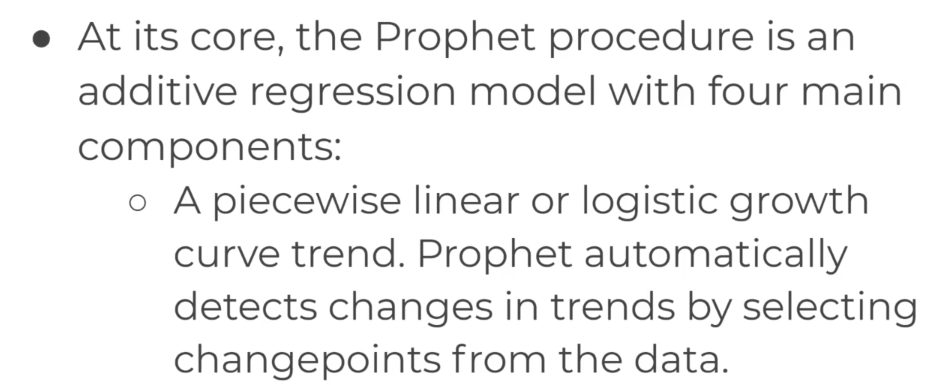

<img 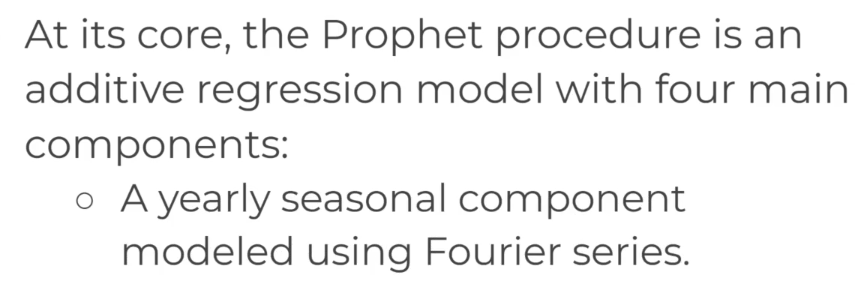

<img 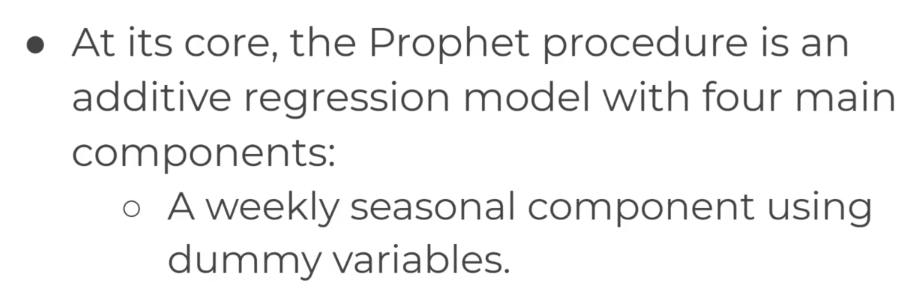

<img 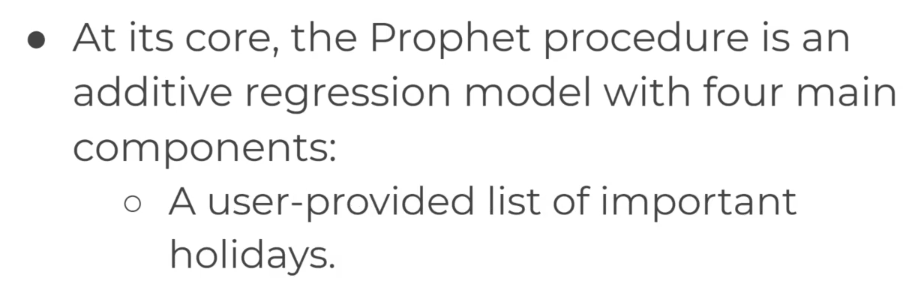

<img 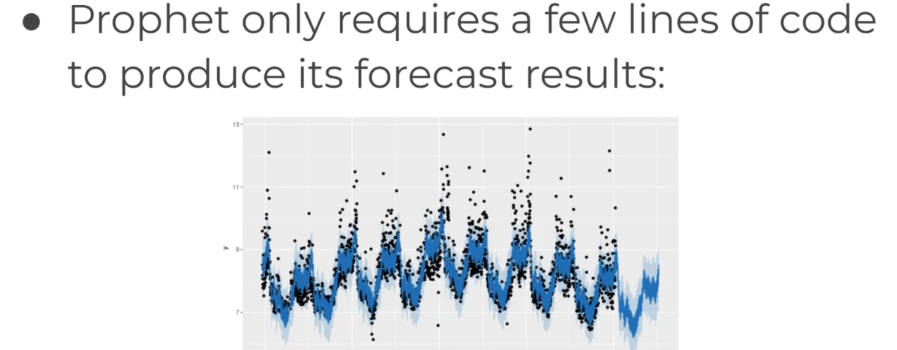

In [ ]:
#!pip install pystan==2.19.1.1

In [ ]:
#conda install -c conda-forge fbprophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


##### DAta formatting

in fb prophet we should rename our output var as y and date column as ds

In [5]:
df.columns =['ds','y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


ds-- > should be pandas datetime object

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


fbprophet usually wants daily data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
#pip freeze requirement.txt

In [11]:
m = Prophet()

In [12]:
## Placeholder to hold our future predictions

In [13]:
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### Placeholder to hold our future predictions

In [14]:
future = m.make_future_dataframe(periods=24,freq='MS')

In [15]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [16]:
future.tail() ## included next 24 months

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [17]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [19]:
len(df)

324

In [20]:
len(future)

348

In [21]:
forecast = m.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1157.413855,1473.318689,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1193.015653,1511.432203,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1434.910986,1751.960108,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1421.501892,1750.803912,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1670.804174,1991.804755,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.823239,5071.281312,5407.298024,5188.024056,5210.592800,39.703050,39.703050,39.703050,39.703050,39.703050,39.703050,0.0,0.0,0.0,5240.526290
344,2020-09-01,5216.882602,4928.459887,5234.558561,5203.106030,5227.481271,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,0.0,0.0,0.0,5083.515075
345,2020-10-01,5232.423922,5022.254160,5341.892036,5217.428975,5243.952141,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,0.0,0.0,0.0,5189.023726
346,2020-11-01,5248.483285,5172.109355,5497.199774,5232.403202,5260.996955,86.835312,86.835312,86.835312,86.835312,86.835312,86.835312,0.0,0.0,0.0,5335.318596


In [23]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4470.684775,4793.467972,4628.826837
337,2020-02-01,4503.359723,4840.209783,4679.423367
338,2020-03-01,4786.627416,5112.322892,4942.771756
339,2020-04-01,4777.136408,5101.329369,4941.310183
340,2020-05-01,5028.098080,5351.693265,5197.838458
341,2020-06-01,5018.678343,5334.119199,5178.810228
342,2020-07-01,5150.485163,5462.275919,5311.203177
343,2020-08-01,5071.281312,5407.298024,5240.526290
344,2020-09-01,4928.459887,5234.558561,5083.515075
345,2020-10-01,5022.254160,5341.892036,5189.023726


In [39]:
import datetime

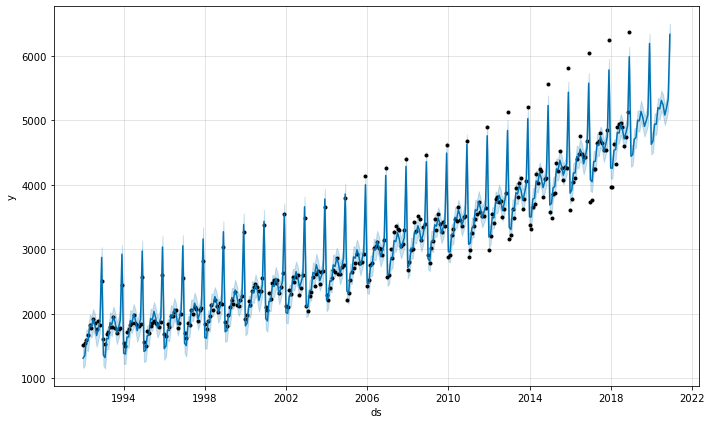

In [43]:
m.plot(forecast);

(735234.0, 737791.0)

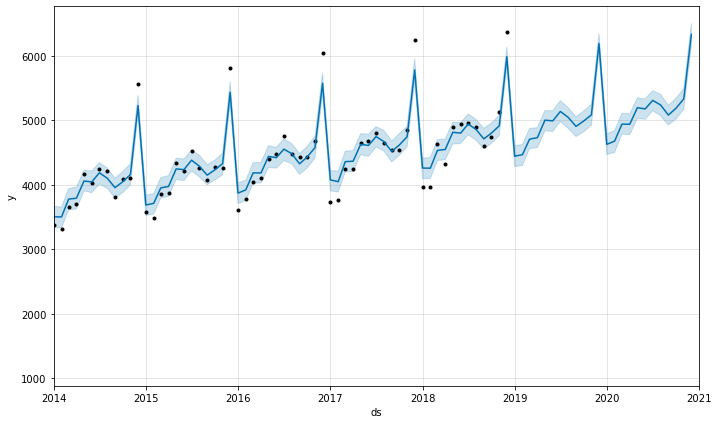

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim(datetime.date(2014,1,1),datetime.date(2021,1,1))

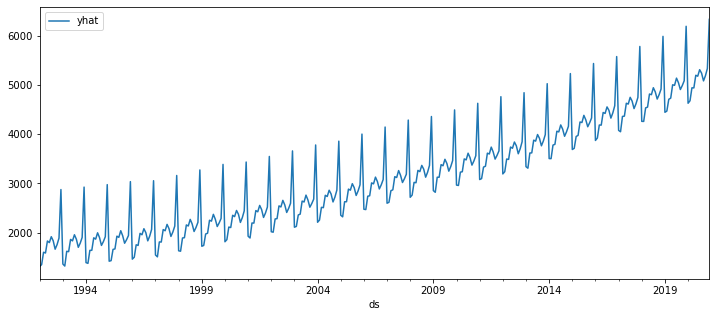

In [45]:
forecast.plot(x='ds',y='yhat',figsize=(12,5))

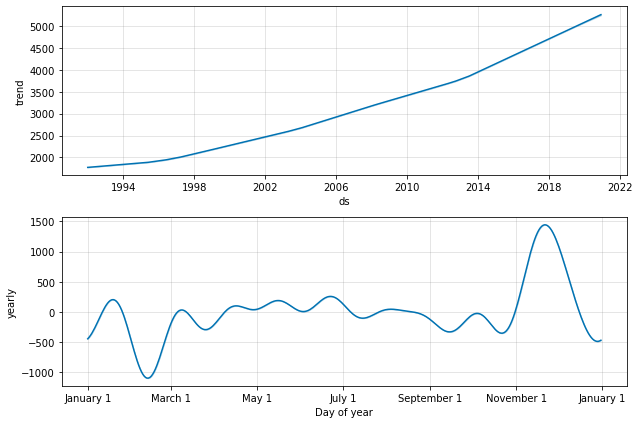

In [48]:
m.plot_components(forecast);